In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


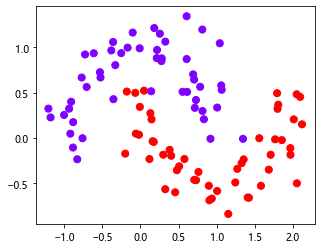

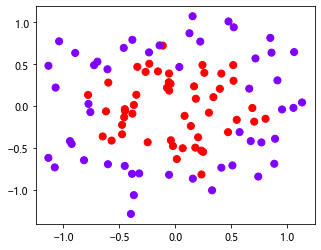

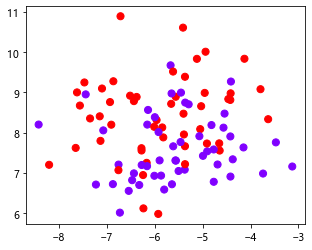

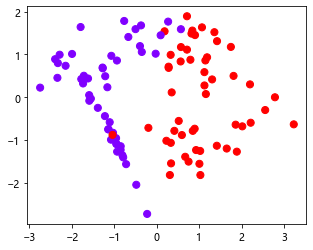

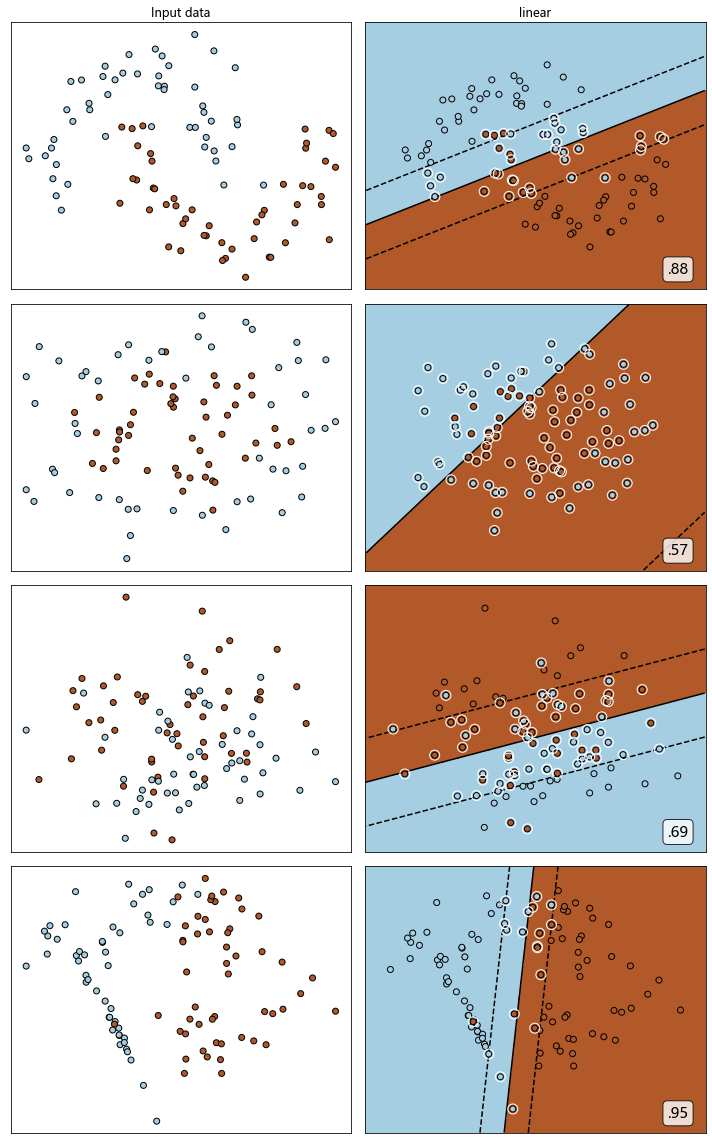

In [3]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
 ]
Kernel = ["linear"] #四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(10,16))
#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):

    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    for est_idx, kernel in enumerate(Kernel):
        ax = axes[ds_cnt, est_idx + 1]
  
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
     
        ax.scatter(X[:, 0], X[:, 1], c=Y
                 ,zorder=10
                 ,cmap=plt.cm.Paired,edgecolors='k')
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10, edgecolors='white')
        
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
   
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
        ax.set_xticks(())
        ax.set_yticks(())
      
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
             , size=15
             , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
             #为分数添加一个白色的格子作为底色
             , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
             , horizontalalignment='right' #位于坐标轴的什么方向
             )
plt.tight_layout()
plt.show()